In [2]:
#Importa dados
import pandas as pd
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

tabela = pd.read_csv("BTC-USD.csv")

display(tabela.info())
#Limpar dados
#Cria modelo
#Treina modelo com dados
#Fazer previsão


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3505 entries, 0 to 3504
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3505 non-null   object 
 1   Open       3505 non-null   float64
 2   High       3505 non-null   float64
 3   Low        3505 non-null   float64
 4   Close      3505 non-null   float64
 5   Adj Close  3505 non-null   float64
 6   Volume     3505 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 191.8+ KB


None

In [3]:
#Limpar dados 
tabela['Date'] = pd.to_datetime(tabela['Date'])
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3505 entries, 0 to 3504
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3505 non-null   datetime64[ns]
 1   Open       3505 non-null   float64       
 2   High       3505 non-null   float64       
 3   Low        3505 non-null   float64       
 4   Close      3505 non-null   float64       
 5   Adj Close  3505 non-null   float64       
 6   Volume     3505 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 191.8 KB


None

In [4]:
# Transformando a coluna 'Date' em datetime
tabela['Date'] = pd.to_datetime(tabela['Date'])

# Criando novas características a partir da data
tabela['Year'] = tabela['Date'].dt.year
tabela['Month'] = tabela['Date'].dt.month
tabela['Day'] = tabela['Date'].dt.day
tabela['DayOfWeek'] = tabela['Date'].dt.dayofweek

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

modelo_arvore = RandomForestRegressor() # modelo arvore de decisao
linear = LinearRegression() #LinearRegression

# Supondo que 'tabela' é seu DataFrame
x = tabela[['Year', 'Month', 'Day', 'DayOfWeek', 'Open', 'High', 'Low', 'Volume']]  # Características
y = tabela['Adj Close']  # Variável alvo

# separamos os dados em treino e teste. Treino vamos dar para os modelos aprenderem e teste vamos usar para ver se o modelo aprendeu corretamente
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

# treinando os modelos
modelo_arvore.fit(x_treino, y_treino)
linear.fit(x_treino, y_treino)  # Correção aqui


LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Fazendo previsões
y_pred_arvore = modelo_arvore.predict(x_teste)
y_pred_linear = linear.predict(x_teste)

# Calculando as métricas para o modelo de árvore
mse_arvore = mean_squared_error(y_teste, y_pred_arvore)
rmse_arvore = np.sqrt(mse_arvore)
mae_arvore = mean_absolute_error(y_teste, y_pred_arvore)
r2_arvore = r2_score(y_teste, y_pred_arvore)

# Calculando as métricas para o modelo linear
mse_linear = mean_squared_error(y_teste, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_teste, y_pred_linear)
r2_linear = r2_score(y_teste, y_pred_linear)


print("Métricas para o modelo de árvore:")
print("Erro Quadrático Médio (MSE):", mse_arvore)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse_arvore)
print("Erro Absoluto Médio (MAE):", mae_arvore)
print("R-quadrado (R²):", r2_arvore)

print("\nMétricas para o modelo linear:")
print("Erro Quadrático Médio (MSE):", mse_linear)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse_linear)
print("Erro Absoluto Médio (MAE):", mae_linear)
print("R-quadrado (R²):", r2_linear)



Métricas para o modelo de árvore:
Erro Quadrático Médio (MSE): 210311.52311308202
Raiz do Erro Quadrático Médio (RMSE): 458.5973431160303
Erro Absoluto Médio (MAE): 224.30437996630238
R-quadrado (R²): 0.9993384495858243

Métricas para o modelo linear:
Erro Quadrático Médio (MSE): 124329.02112550996
Raiz do Erro Quadrático Médio (RMSE): 352.60320634604267
Erro Absoluto Médio (MAE): 167.46837833973274
R-quadrado (R²): 0.9996089138902037


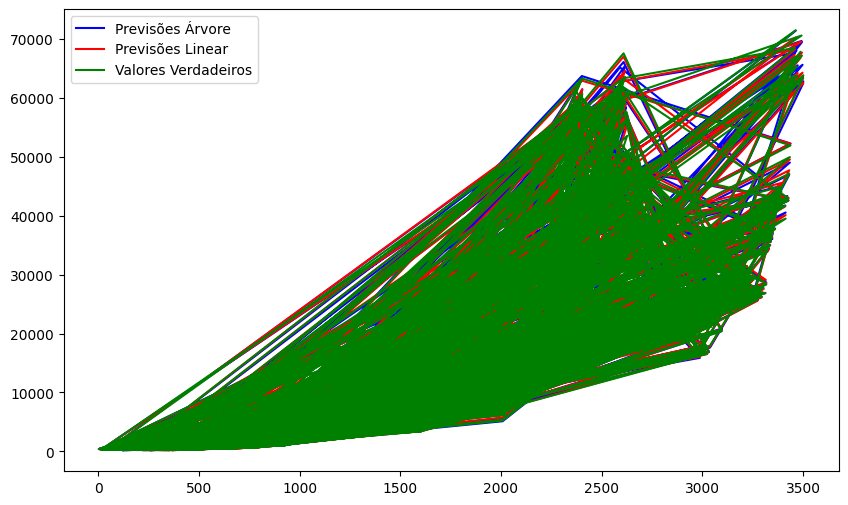

In [7]:
import matplotlib.pyplot as plt

# Fazendo previsões
y_pred_arvore = modelo_arvore.predict(x_teste)
y_pred_linear = linear.predict(x_teste)

# Criando um gráfico
plt.figure(figsize=(10, 6))

# Plotando as previsões do modelo de árvore
plt.plot(y_teste.index, y_pred_arvore, color='blue', label='Previsões Árvore')

# Plotando as previsões do modelo linear
plt.plot(y_teste.index, y_pred_linear, color='red', label='Previsões Linear')

# Plotando os valores verdadeiros
plt.plot(y_teste.index, y_teste, color='green', label='Valores Verdadeiros')

plt.legend()
plt.show()


In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Primeiro, vamos criar um DataFrame para os próximos 60 dias
dates = pd.date_range(start=datetime.now(), periods=60)

# Vamos criar um DataFrame vazio com essas datas
novos_dados = pd.DataFrame(dates, columns=['Date'])

# Agora, vamos adicionar as outras colunas (Year, Month, Day, DayOfWeek)
# Estamos supondo que 'Open', 'High', 'Low', 'Volume' são constantes e iguais à média dos valores existentes
novos_dados['Year'] = novos_dados['Date'].dt.year
novos_dados['Month'] = novos_dados['Date'].dt.month
novos_dados['Day'] = novos_dados['Date'].dt.day
novos_dados['DayOfWeek'] = novos_dados['Date'].dt.dayofweek
novos_dados['Open'] = x['Open'].mean()
novos_dados['High'] = x['High'].mean()
novos_dados['Low'] = x['Low'].mean()
novos_dados['Volume'] = x['Volume'].mean()

# Agora, podemos usar o modelo para fazer previsões
previsoes = linear.predict(novos_dados[['Year', 'Month', 'Day', 'DayOfWeek', 'Open', 'High', 'Low', 'Volume']])

# Adicionamos as previsões ao DataFrame
novos_dados['Previsao'] = previsoes

# Agora, 'novos_dados' contém as previsões para os próximos 60 dias
print(novos_dados)
# Salvar as previsões em um arquivo CSV
novos_dados.to_csv('previsoes.csv', index=False)





                         Date  Year  Month  Day  DayOfWeek          Open  \
0  2024-06-14 17:58:20.186343  2024      6   14          4  15890.346286   
1  2024-06-15 17:58:20.186343  2024      6   15          5  15890.346286   
2  2024-06-16 17:58:20.186343  2024      6   16          6  15890.346286   
3  2024-06-17 17:58:20.186343  2024      6   17          0  15890.346286   
4  2024-06-18 17:58:20.186343  2024      6   18          1  15890.346286   
5  2024-06-19 17:58:20.186343  2024      6   19          2  15890.346286   
6  2024-06-20 17:58:20.186343  2024      6   20          3  15890.346286   
7  2024-06-21 17:58:20.186343  2024      6   21          4  15890.346286   
8  2024-06-22 17:58:20.186343  2024      6   22          5  15890.346286   
9  2024-06-23 17:58:20.186343  2024      6   23          6  15890.346286   
10 2024-06-24 17:58:20.186343  2024      6   24          0  15890.346286   
11 2024-06-25 17:58:20.186343  2024      6   25          1  15890.346286   
12 2024-06-2